In [17]:
import pickle
import numpy as np
import re
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def plotStuff(task, metric, limits=[0.,1.], models=["SVM", "SVMb", "LSTMng", "LSTMcv", "LSTMb"], sorted=True, sortModel="SVM"):
    maps = defaultdict(list)
    
    colors = {
        "SVM" : 'y',
        "SVMb" : 'b',
        "LSTMng" : 'k',
        "LSTMcv" : 'g',
        "LSTMb" : 'r',
    }
    
    modelNumber = {
        "sede1":{
            "LSTMng" : 5,
            "LSTMcv" : 9,
            "LSTMb" : 7,
        },
        "sede12":{
            "LSTMng" : 5,
            "LSTMcv" : 9,
            "LSTMb" : 9,
        },
        "morfo1":{
            "LSTMng" : 4,
            "LSTMcv" : 9,
            "LSTMb" : 6,
        },
        "morfo2":{
            "LSTMng" : 2,
            "LSTMcv" : 9,
            "LSTMb" : 3,
        },
    }
    
    for fold in range(10):
        fileNames = {
            "SVM" : "./filesFolds-SVM/output/"+str(fold)+"/evaluation.p",
            "SVMb" : "./filesFolds-SVMbigrams/output/"+str(fold)+"/evaluation.p",
            "LSTMng" : "./filesFolds-LSTMnoGloVe/output/"+str(fold)+"/evaluation"+task.capitalize()+"-"+str(modelNumber[task]["LSTMng"])+".p",
            "LSTMcv" : "./filesFolds-LSTMconvolutional2/output/"+str(fold)+"/evaluation"+task.capitalize()+"-"+str(modelNumber[task]["LSTMcv"])+".p",
            "LSTMb" : "./filesFolds-LSTMbidirectional5e/output/"+str(fold)+"/evaluation"+task.capitalize()+"-"+str(modelNumber[task]["LSTMb"])+".p",
        }
        
        fileEvaluation = {}
        for model in models:
            fileEvaluation[model] = fileNames[model]
        
        for key in fileEvaluation:
            metrics = pickle.load(open(fileEvaluation[key], 'rb'))
            if key in ["SVM", "SVMb"]:
                metrics = metrics[task]
            maps[key].append(metrics[metric])

        
    fig, ax = plt.subplots(figsize=(12,8))
    index = np.arange(10)
    bar_width = 0.15
    opacity = 0.8

    for key in maps:
        maps[key] = np.array(maps[key])

    if sorted:
        asort = np.argsort(maps[sortModel])
    else:
        asort = range(10)
    for key in maps:
        maps[key] = maps[key][asort]
    
    plt.grid()

    for i,key in enumerate(maps):
        plt.bar(index + i*bar_width, maps[key], bar_width,
                     alpha=opacity,
                     color=colors[key],
                     label=key)
    
    plt.xticks(index + bar_width, asort)

    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.ylim(limits)
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.show()

In [11]:
def plotOperatore(task, limits=[0.,1.], models=["opInsTrain", "opInsTest", "opAggTrain", "opAggTest"], ops=[]):
    maps = defaultdict(lambda : defaultdict(list))
    op = defaultdict(lambda : defaultdict(Counter))
    operators = set()
    
    colors = {
        "opInsTrain" : 'red',
        "opInsTest" : 'orange',
        "opAggTrain" : 'k',
        "opAggTest" : 'b',
    }
    
    for fold in range(10):
        fileNames = {
            "opInsTrain" : "./corpusLSTM_ICDO3-bis/folds10/"+task+"/"+str(fold)+"/opInsTrain.txt",
            "opInsTest" : "./corpusLSTM_ICDO3-bis/folds10/"+task+"/"+str(fold)+"/opInsTest.txt",
            "opAggTrain" : "./corpusLSTM_ICDO3-bis/folds10/"+task+"/"+str(fold)+"/opAggTrain.txt",
            "opAggTest" : "./corpusLSTM_ICDO3-bis/folds10/"+task+"/"+str(fold)+"/opAggTest.txt",
        }
        
        fileEvaluation = {}
        for model in models:
            fileEvaluation[model] = fileNames[model]
        
        for key in fileEvaluation:
            with open(fileEvaluation[key], 'r') as fid:
                op[key][fold] = Counter(map(lambda l: re.sub('\n','',l), fid.readlines()))
                for operator in op[key][fold]:
                    operators.add(operator)
                    
        if len(ops) > 0:
            operators = set(ops)

    
    for fold in range(10):
        
        fileEvaluation = {}
        for model in models:
            fileEvaluation[model] = fileNames[model]
        
        for key in fileEvaluation:
            for operator in operators:
                maps[operator][key].append(op[key][fold][operator])

    for key1 in maps:
        for key2 in maps[key1]:
            maps[key1][key2] = np.array(maps[key1][key2])

    for num in maps.keys():
        fig, ax = plt.subplots()
        index = np.arange(10)
        bar_width = 0.15
        opacity = 0.8

        plt.grid()

        for i,key in enumerate(maps[num]):
            plt.bar(index + i*bar_width, maps[num][key], bar_width,
                         alpha=opacity,
                         color=colors[key],
                         label=key)

        plt.xticks(index + bar_width, range(10))

        plt.legend(loc='lower right')

        plt.tight_layout()
        #plt.ylim(limits)
        plt.xlabel("Fold")
        plt.ylabel(num)
        plt.show()

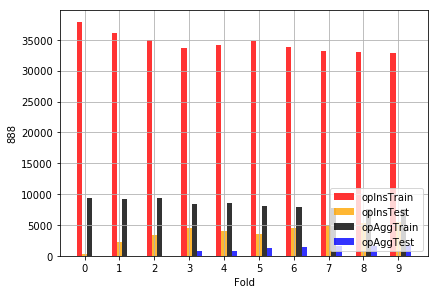

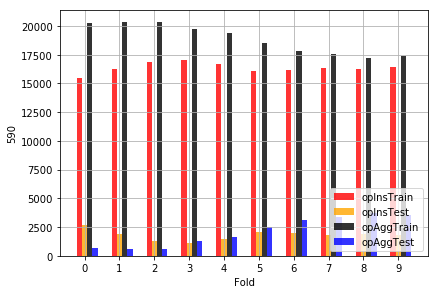

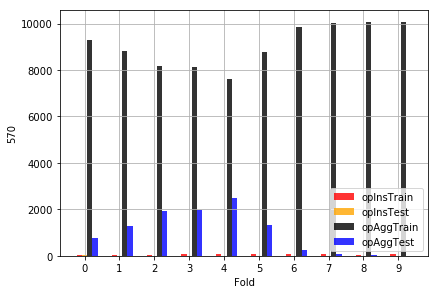

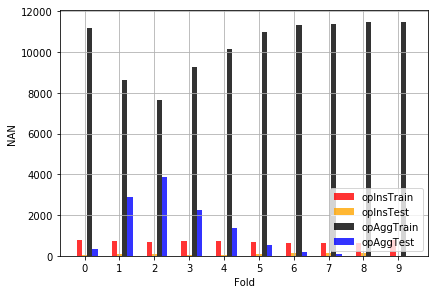

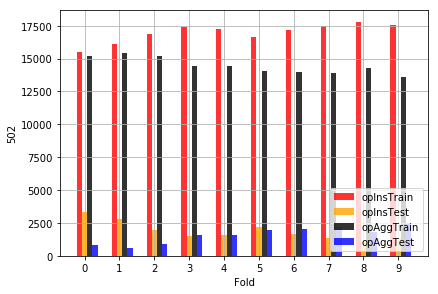

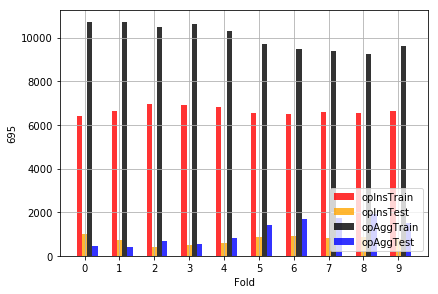

In [12]:
plotOperatore('sede12', ops=['570', '502', '590', 'NAN', '888', '695'])

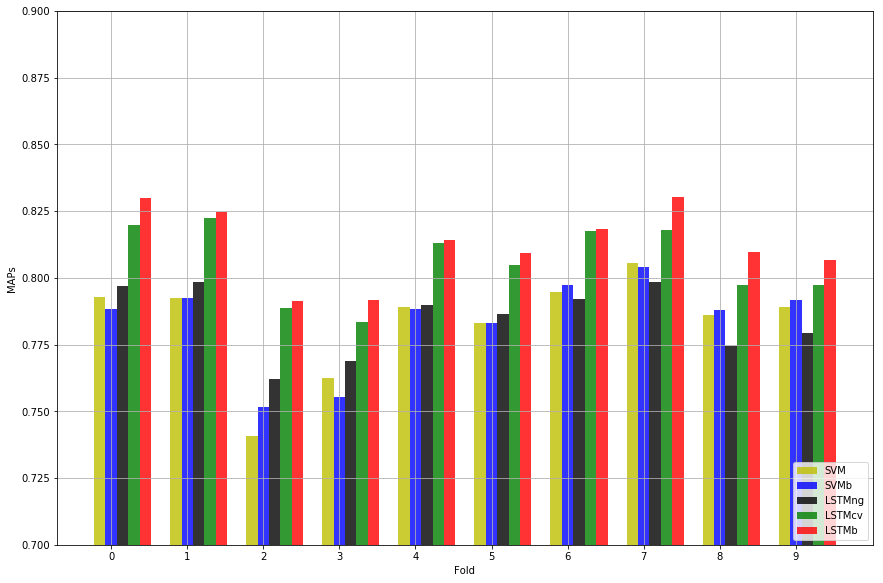

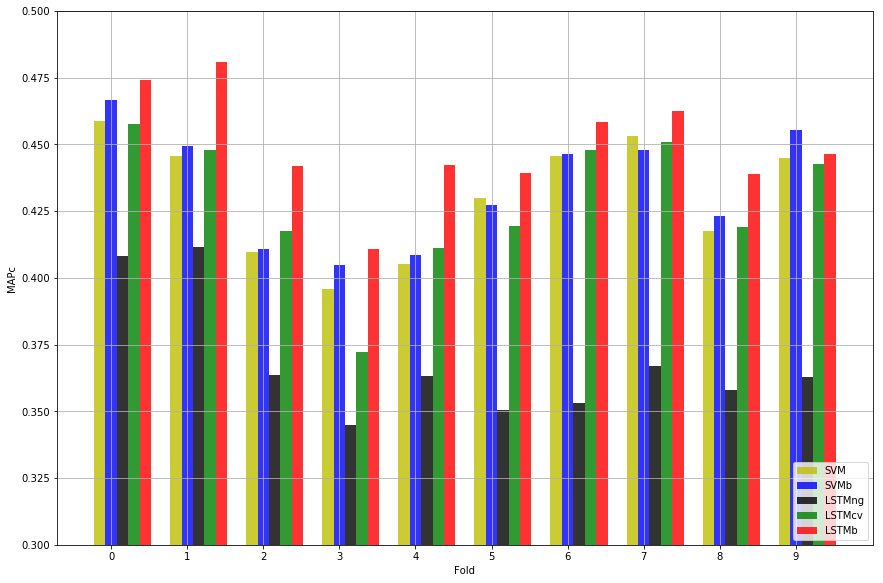

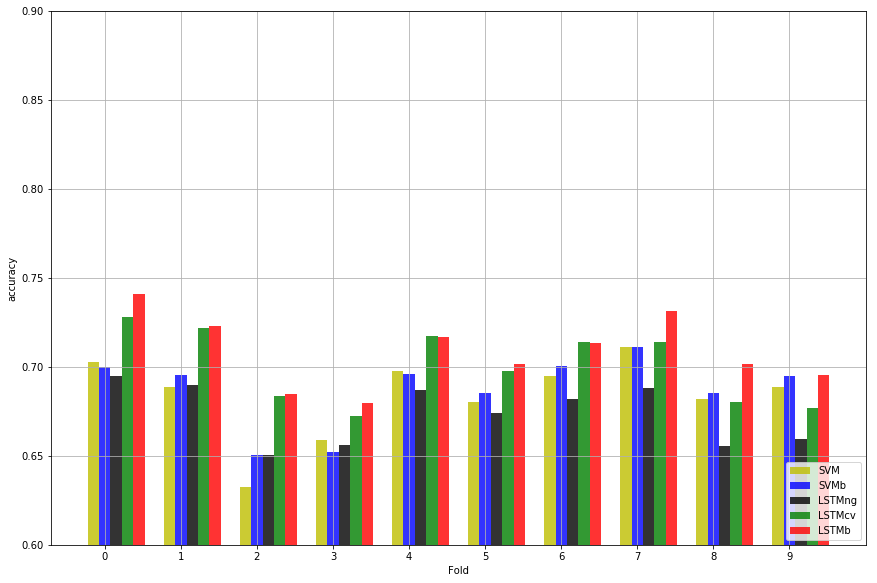

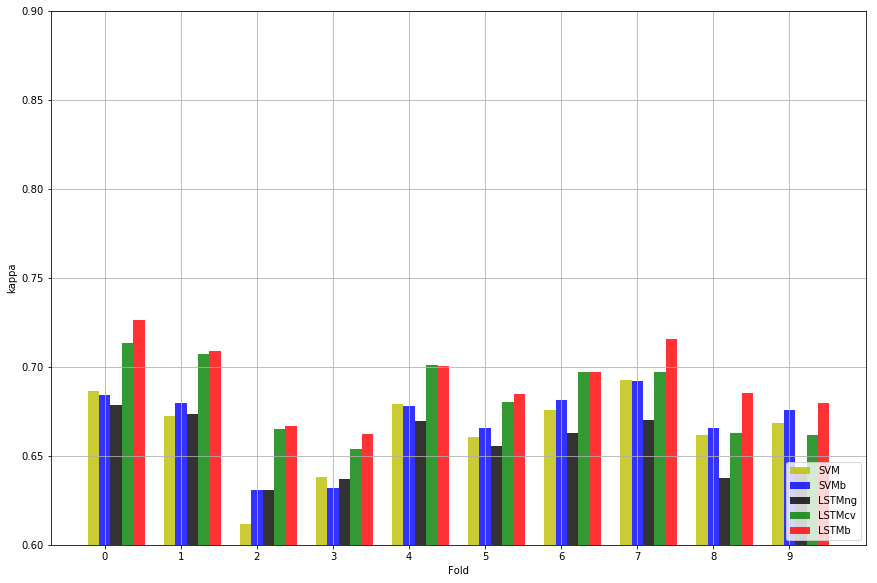

In [40]:
#plotStuff('sede12', 'MAPs', [0.72, 0.84])
#plotStuff('sede12', 'MAPc', [0.3, 0.5])
#plotStuff('sede12', 'accuracy', [0.62, 0.75])
#plotStuff('sede12', 'kappa', [0.6, 0.74])

plotStuff('sede12', 'MAPs', sorted=False, limits=[.7,.9])
plotStuff('sede12', 'MAPc', sorted=False, limits=[.3,.5])
plotStuff('sede12', 'accuracy', sorted=False, limits=[.6,.9])
plotStuff('sede12', 'kappa', sorted=False, limits=[.6,.9])

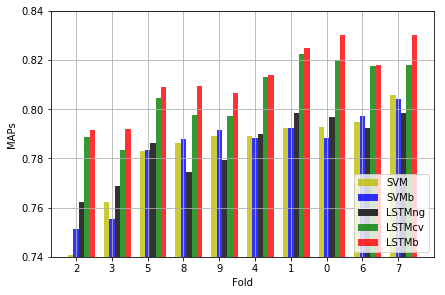

In [32]:
plotStuff('sede12', 'MAPs', sorted=True, limits=[0.74, 0.84])

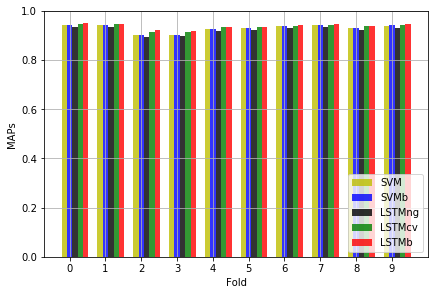

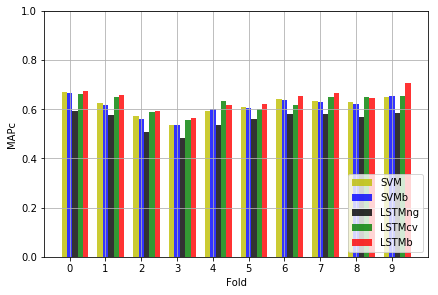

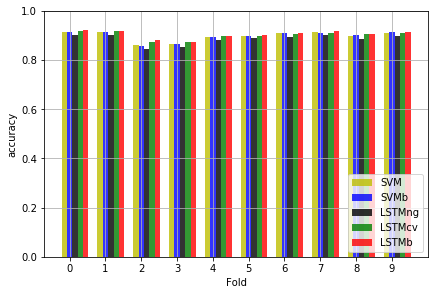

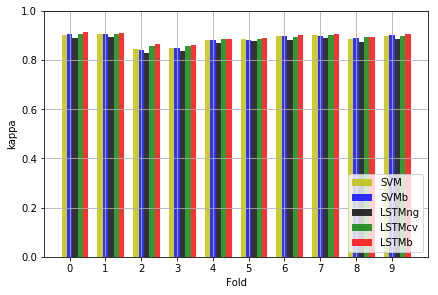

In [4]:
plotStuff('sede1', 'MAPs', sorted=False)
plotStuff('sede1', 'MAPc', sorted=False)
plotStuff('sede1', 'accuracy', sorted=False)
plotStuff('sede1', 'kappa', sorted=False)

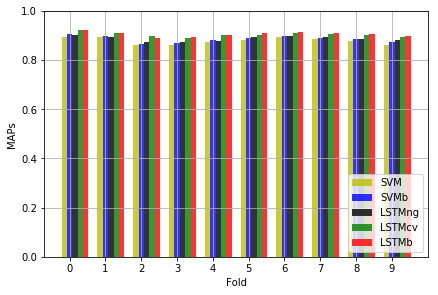

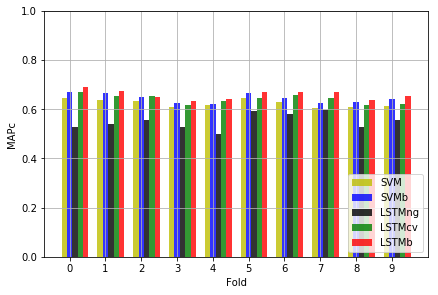

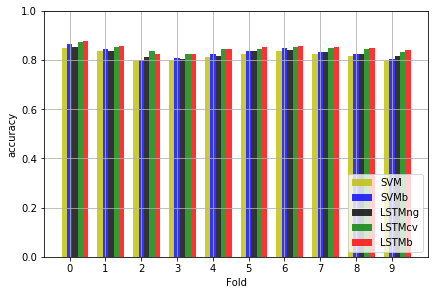

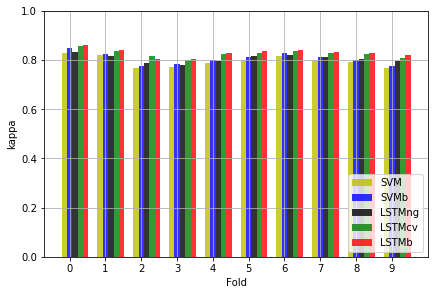

In [15]:
plotStuff('morfo1', 'MAPs', sorted=False)
plotStuff('morfo1', 'MAPc', sorted=False)
plotStuff('morfo1', 'accuracy', sorted=False)
plotStuff('morfo1', 'kappa', sorted=False)

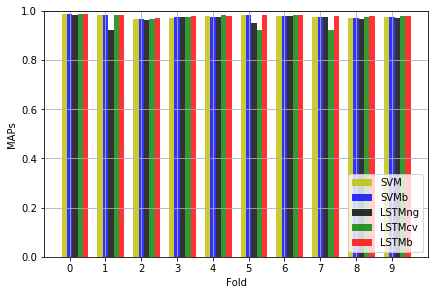

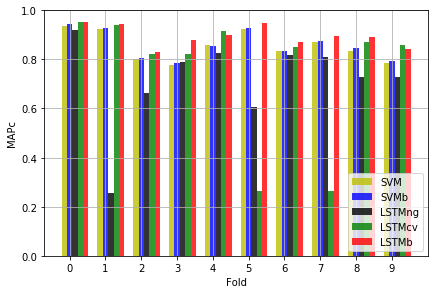

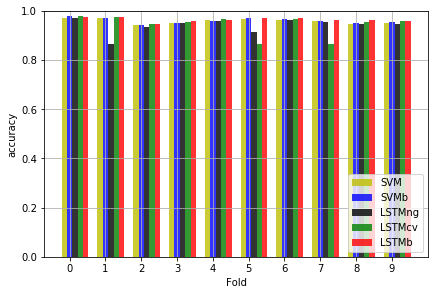

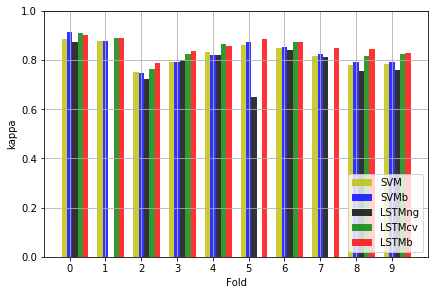

In [28]:
plotStuff('morfo2', 'MAPs', sorted=False)
plotStuff('morfo2', 'MAPc', sorted=False)
plotStuff('morfo2', 'accuracy', sorted=False)
plotStuff('morfo2', 'kappa', sorted=False)